# Load Library

In [ ]:
# Import our modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import attrgetter
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
# Run this only when you run the script using google colaboratory
from google.colab import drive
drive.mount('/content/drive')

import os
# adjust the path with your own google drive folder path
os.chdir("/content/drive/My Drive/Webinar/Big Data Analytics")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# download dataset https://www.kaggle.com/carrie1/ecommerce-data
dataset = pd.read_csv("ecommerce_data.csv",encoding= 'unicode_escape')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# check missing value
dataset.isnull().sum()

# remove rows that have missing value
dataset = dataset.dropna()

# Add new column sales with formula = Quantity * UnitPrice
dataset["Sales"] = dataset["Quantity"] * dataset["UnitPrice"]

# Convert data types for some columns
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"])
dataset["CustomerID"] = dataset["CustomerID"].astype("int64")
dataset["InvoiceDate_date"] = dataset["InvoiceDate"].dt.date

# Add new column monthyear
dataset["monthyear"] = pd.to_datetime(dataset["InvoiceDate"]).dt.to_period('M')

dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceDate_date,monthyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,2011-12


# Monthly Cohort Retention

Cohort analysis for retention helps you understand how many customers continue to be active users in the days/weeks/months that follow

In [ ]:
# get unique customer_id and transaction_date
customer_date = dataset[["CustomerID","monthyear"]].drop_duplicates()

# sort by monthyear ascending
customer_date = customer_date.sort_values(["CustomerID","monthyear"])

customer_date

,CustomerID,monthyear
61619,12346,2011-01
14938,12347,2010-12
72246,12347,2011-01
148285,12347,2011-04
220572,12347,2011-06
...,...,...
422473,18283,2011-10
456033,18283,2011-11
530454,18283,2011-12
198716,18287,2011-05


In [ ]:
# get first monthyear for each customer
first_month_trx = customer_date.groupby("CustomerID").agg({"monthyear":"min"}).reset_index()
first_month_trx.columns = ["CustomerID","first_month"]

first_month_trx

,CustomerID,first_month
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02
...,...,...
4367,18280,2011-03
4368,18281,2011-06
4369,18282,2011-08
4370,18283,2011-01


In [ ]:
# merge first_month_trx with customer_date
customer_date = customer_date.merge(first_month_trx,on="CustomerID")

# add interval between first_month and transaction_date
customer_date["interval"] = (customer_date["monthyear"] - customer_date["first_month"]).apply(attrgetter('n'))

customer_date

,CustomerID,monthyear,first_month,interval
0,12346,2011-01,2011-01,0
1,12347,2010-12,2010-12,0
2,12347,2011-01,2010-12,1
3,12347,2011-04,2010-12,4
4,12347,2011-06,2010-12,6
...,...,...,...,...
13670,18283,2011-10,2011-01,9
13671,18283,2011-11,2011-01,10
13672,18283,2011-12,2011-01,11
13673,18287,2011-05,2011-05,0


In [ ]:
# group by first month and interval then count customerID
cohort_retention = customer_date.groupby(["first_month","interval"]).agg({"CustomerID":"nunique"}).reset_index()
cohort_retention

,first_month,interval,CustomerID
0,2010-12,0,948
1,2010-12,1,362
2,2010-12,2,317
3,2010-12,3,367
4,2010-12,4,341
...,...,...,...
86,2011-10,1,93
87,2011-10,2,46
88,2011-11,0,321
89,2011-11,1,43


In [ ]:
# get customer month index 0
customer_month0 = cohort_retention[cohort_retention.interval==0][["first_month","CustomerID"]]
customer_month0.columns = ["first_month","customer_month0"]
customer_month0

,first_month,customer_month0
0,2010-12,948
13,2011-01,421
25,2011-02,380
36,2011-03,440
46,2011-04,299
55,2011-05,279
63,2011-06,235
70,2011-07,191
76,2011-08,167
81,2011-09,298


In [ ]:
# calculate customer retention rate (%) compared to customer in month index 0
cohort_retention = cohort_retention.merge(customer_month0,on="first_month")
cohort_retention["customer_retention"] = round(cohort_retention["CustomerID"] / cohort_retention["customer_month0"] * 100, 1)
cohort_retention

,first_month,interval,CustomerID,customer_month0,customer_retention
0,2010-12,0,948,948,100.0
1,2010-12,1,362,948,38.2
2,2010-12,2,317,948,33.4
3,2010-12,3,367,948,38.7
4,2010-12,4,341,948,36.0
...,...,...,...,...,...
86,2011-10,1,93,352,26.4
87,2011-10,2,46,352,13.1
88,2011-11,0,321,321,100.0
89,2011-11,1,43,321,13.4


In [ ]:
# re-shape cohort retention by absolute number
cohort_retention_number = cohort_retention.pivot(index='first_month',columns='interval',values='CustomerID')
cohort_retention_number = cohort_retention_number.fillna(0)
cohort_retention_number

interval,0,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,0.0
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,0.0,0.0
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,0.0,0.0,0.0
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,0.0,0.0,0.0,0.0
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,0.0,0.0,0.0,0.0,0.0
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-08,167.0,42.0,42.0,42.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


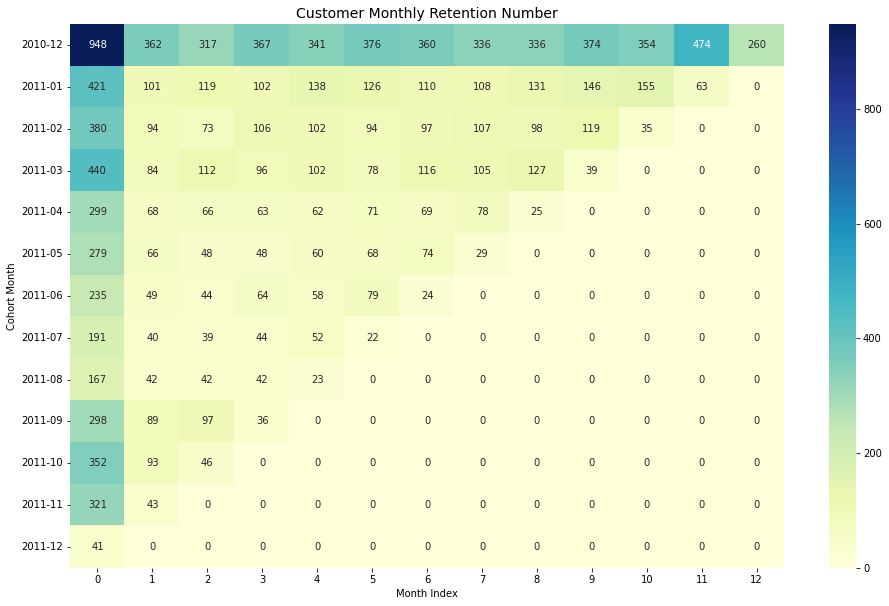

In [ ]:
# visualize cohort retention by absolute number

# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Customer Monthly Retention Number', fontsize = 14)
# Creating the heatmap
sns.heatmap(cohort_retention_number, annot = True,vmin = 0.0, vmax =cohort_retention.CustomerID.max(),cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Month Index')
plt.yticks( rotation='360')
plt.show()

In [ ]:
# re-shape customer retention by percentage
cohort_retention_perc = cohort_retention.pivot(index='first_month',columns='interval',values='customer_retention')
cohort_retention_perc = cohort_retention_perc.fillna(0)
cohort_retention_perc.index = cohort_retention_perc.index.strftime('%Y-%m')
cohort_retention_perc

interval,0,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,0.0
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,0.0,0.0
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,0.0,0.0,0.0
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,0.0,0.0,0.0,0.0
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,0.0,0.0,0.0,0.0,0.0
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,0.0,0.0,0.0,0.0,0.0,0.0
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-08,100.0,25.1,25.1,25.1,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


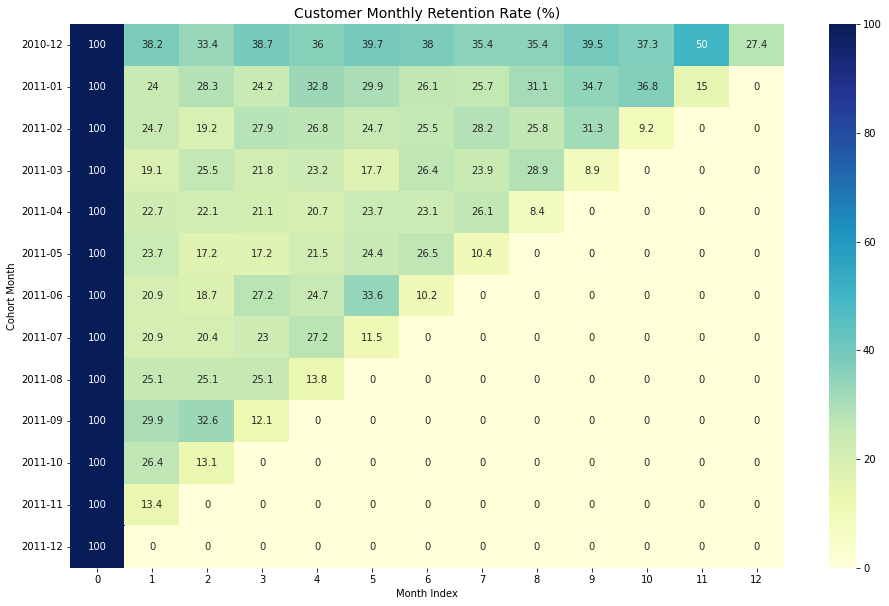

In [ ]:
# visualize cohort retention by percentage

# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Customer Monthly Retention Rate (%)', fontsize = 14)
# Creating the heatmap
sns.heatmap(cohort_retention_perc, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Month Index')
plt.yticks( rotation='360')
plt.show()